# Desafio Trilha de Ciência de Dados

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


In [ ]:
df.info()

In [ ]:
df.describe()

## EDA

###  Visualize e entenda todas as colunas numéricas.

In [6]:
numerical = [
    "idade",
    "preco_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo",
]

#### Perguntas guias para as categorias numéricas:

- Existem dados faltantes no seu conjunto?

**Resposta:** Sim, como mostrado no código abaixo, a coluna idade tem um total de 177 dados faltantes.

In [7]:
def get_missing_data_columns(df):
  # Pegando o valor total de dados faltantes para o dataframe repassado
  missing_data_size = df.isnull().sum()
  #
  missing_data_columns = ((missing_data_size[missing_data_size > 0]).sort_values(ascending=False).to_frame(name='Count'))
  #
  missing_data_columns = (missing_data_columns.assign(Column=missing_data_columns.index)).reset_index(drop=True)

  return missing_data_columns

# Passando todos os dados para a categoria de variáveis discretas para a função de pegar os valores faltantes.
missing_discret_data = get_missing_data_columns(df.loc[:,numerical])
missing_discret_data

,Count,Column
0,177,idade


Na plotagem abaixo podemos visualizar que os dados faltantes representam um total de 19.87% em relação ao total da amostra.

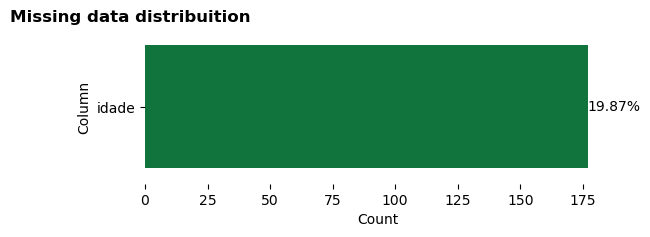

In [8]:
def plot_missing_data(missing_data_columns):
  # Define uma figura de tamanho (6, 2) para comportar a plotagem
  plt.figure(figsize=(6, 2))
  # Plotagem de um gráfico de barras na horizontal mostrando a quantidade de dados faltantes por colunas
  ax = sns.barplot(data=missing_data_columns, x='Count', y='Column', color="#00853B")
  # Remoção do contorno do gráfico de barras para facilitar a visualização
  sns.despine(left=True, bottom=True)
  # Modificação da label do gráfico para ser equivalente a porcentagem em relação ao tamanho total da amostra
  ax.bar_label(ax.containers[0], labels=[f"{i:.2f}%" for i in missing_data_columns.Count.astype(int) / len(df) * 100])
  # Definição do subtítulo do gráfico
  plt.suptitle("Missing data distribuition", ha='left', va='top', x=-.1, fontweight='bold')
  # Mostrando a figura final
  plt.show()

plot_missing_data(missing_discret_data)

- Quais as suas distribuições?

**Resposta:** Abaixo temos a distribuição de cada coluna especificada como variável numérica no formato de um histograma. Podemos notar que a maioria das idades estão 20 e 40 anos de idade, assim como a maioria dos bilhetes tiveram seu preço menor que R$ 100,00. Podemos notar também que mais da metade dos passageiros levaram nenhum ou apenas um irmão ou cônjuge. Também ressalta-se que mais da metade dos passageiros levaram nenhum ou um pais/filhos.

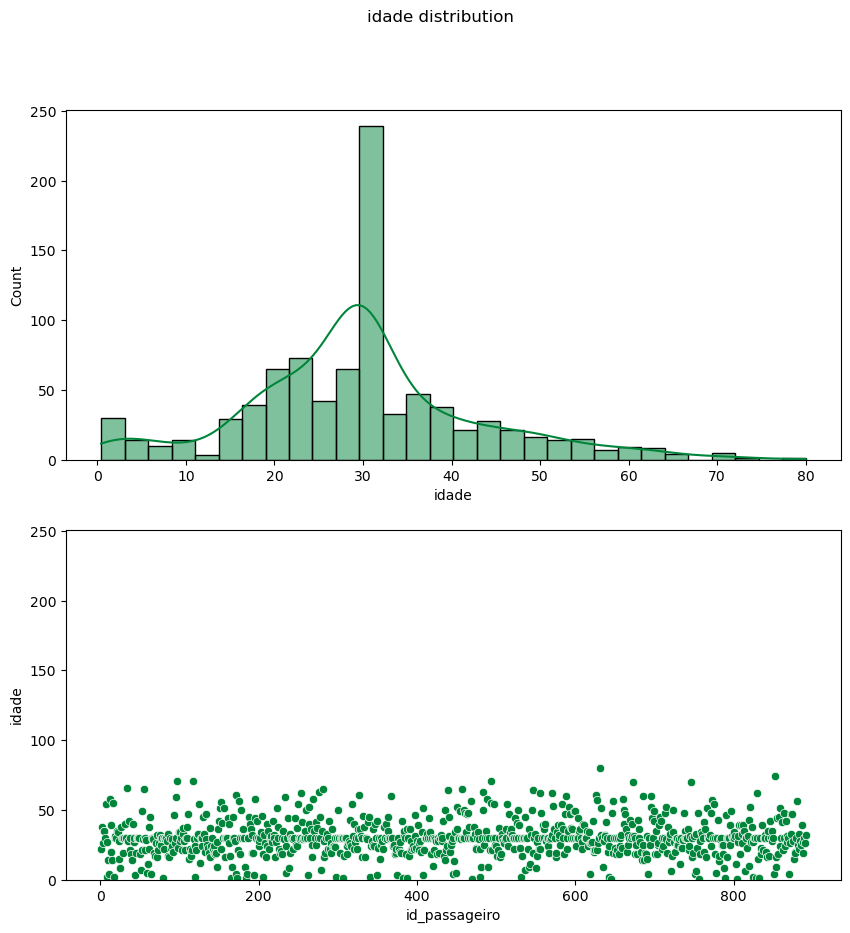

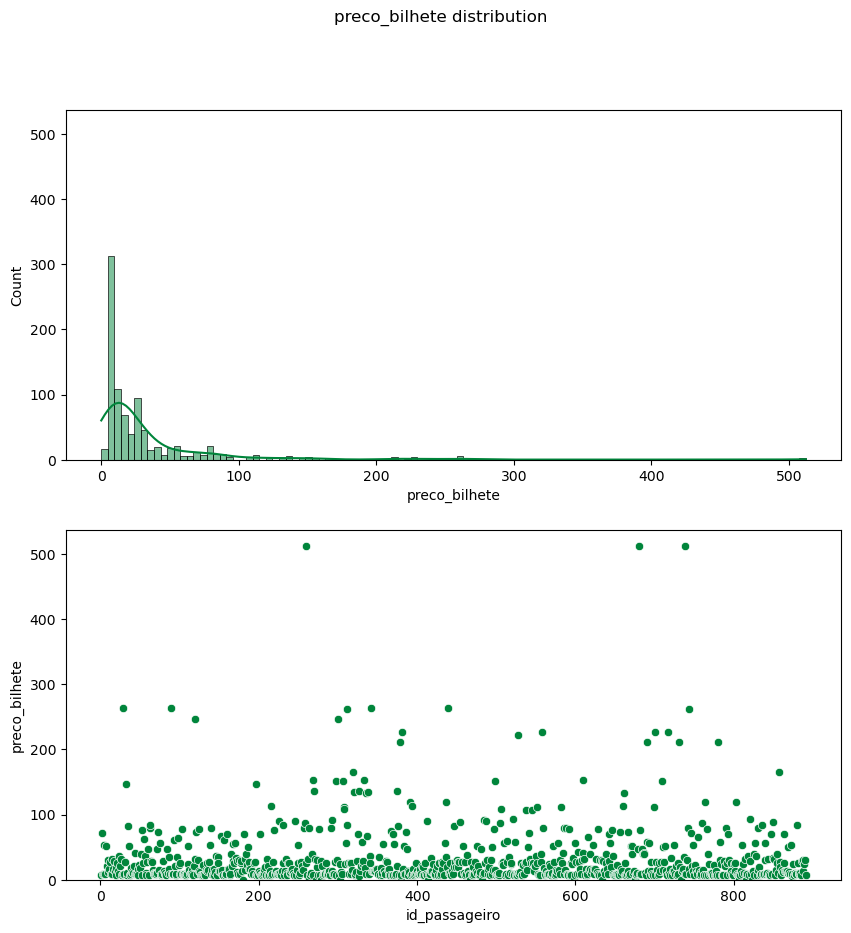

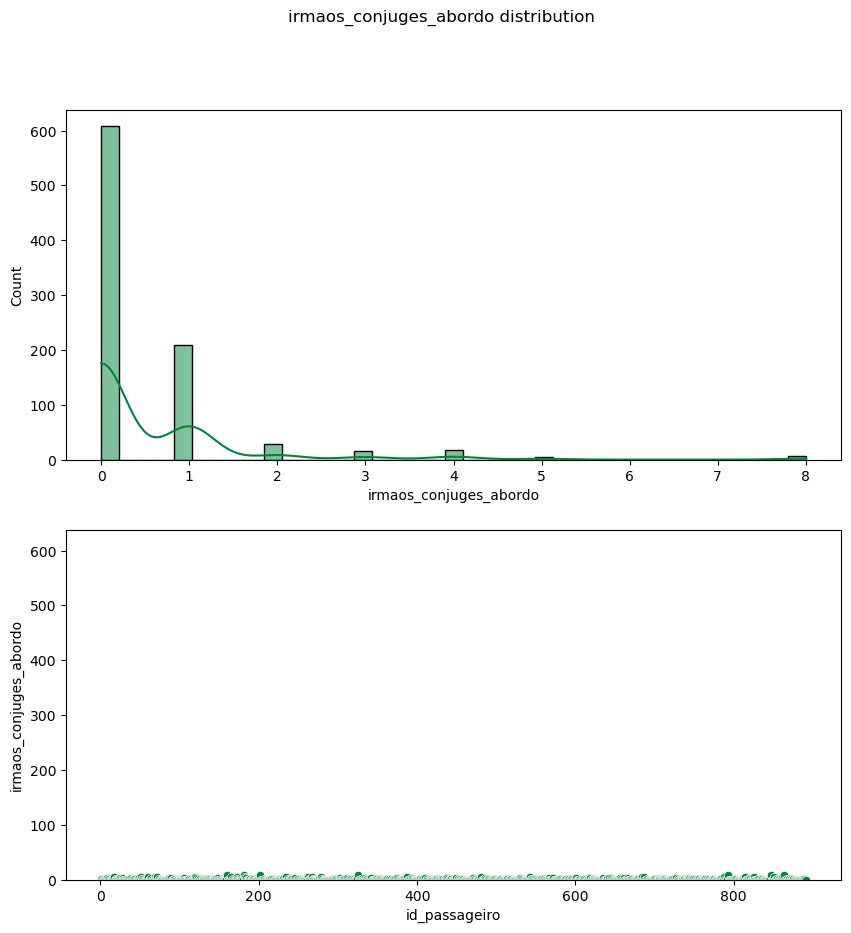

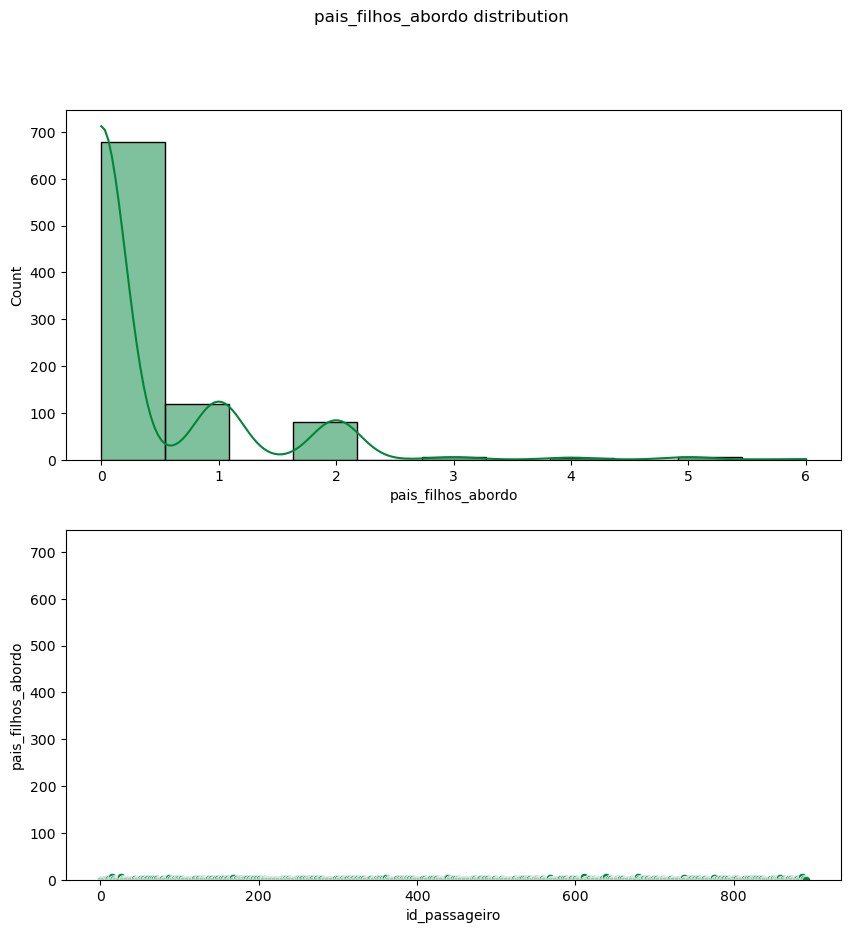

In [152]:
def plot_distribution_discret_variables(df, feature):
  # Define uma figura de tamanho (2, 1) para comportar a plotagem dos 4 histogramas no layout de uma matriz (2, 2)
  fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
  # Definição do subtítulo do gráfico
  fig.suptitle(f'{feature} distribution')
  # Criação de um histograma de distribuição dos valores associados a coluna idade
  sns.histplot(ax=axes[0], x=f"{feature}", data=df, color="#00853B", kde=True)
  sns.scatterplot(ax=axes[1], data=df[feature], color="#00853B")
  plt.show()

plot_distribution_discret_variables(df, 'idade')
plot_distribution_discret_variables(df, 'preco_bilhete')
plot_distribution_discret_variables(df, 'irmaos_conjuges_abordo')
plot_distribution_discret_variables(df, 'pais_filhos_abordo')

- Temos outliers neste subconjunto? (utilize a definição numérica de outliers apresentado na trilha para fazer essa verificação)

**Resposta:** Sim, o resultado abaixo mostra a quantidade de dados faltantes para cada coluna analisada, podemos notar que todas tem uma quantidade de dados faltantes.
O código abaixo utilizou o método utilizando z_score para identificar os outliers, definindo o threshold como 3 para limitar os valores aceitáveis de desvio padrão.

In [178]:
def get_outliers(df):
  # Define um dicionário para cada variável numérica contendo, em casa campo, uma lista de anomalinas detectada para esta coluna.
  outliers = {x:[] for x in numerical}

  # Percorre o dataframe para cada coluna dentro das variáveis numéricas e encontrar as anomalias para esta coluna.
  for column in numerical:
    # Pega os dados apenas da coluna em questão.
    data = df.loc[:,column]
    # Pega a média dos dados desta coluna.
    mean = np.mean(data)
    # Pega o desvio padrão dos dados desta coluna.
    std = np.std(data)
    # Define um threshold para ser o delimitador do limite de desvio padrão, para um valor ser considerado uma anomalia.
    thresh = 3

    # Para cada valor dentro da coluna especificada, calcula se está fora do limite do threshold, se sim, é uma anomalia.
    for value in data:
      # Calula o z_score para verificação.
      z_score = (value - mean) / std

      # Verifica se está no limite do threshold.
      if abs(z_score) > thresh:
          # Se estiver, é adicionado na lista equivalente a sua coluna no dicionário de anomalias.
          outliers[column].append(value)

  return outliers
    
# Envia o dataframe para a função de encontrar as anomalias.
outliers = get_outliers(df)

for column in outliers:
  print(f"Coluna {column}: {len(column)} outliers, um total de {len(column)/df[column].shape[0]*100}%.")

Coluna idade: 5 outliers, um total de 0.5611672278338945%.
Coluna preco_bilhete: 13 outliers, um total de 1.4590347923681257%.
Coluna irmaos_conjuges_abordo: 22 outliers, um total de 2.4691358024691357%.
Coluna pais_filhos_abordo: 18 outliers, um total de 2.0202020202020203%.


<Axes: >

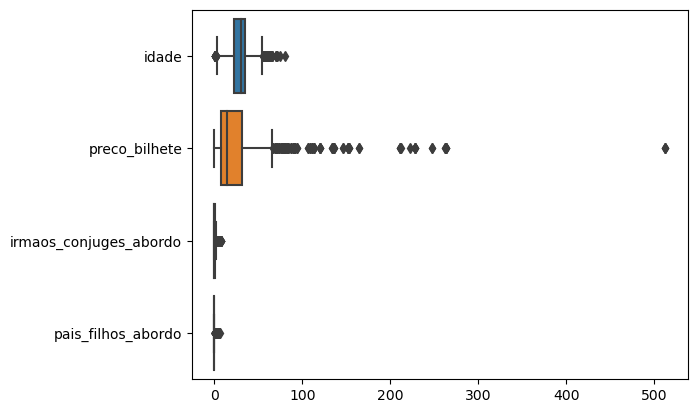

In [180]:
sns.boxplot(data=df[outliers.keys()], orient='h')

- Existe alguma correlação entre essas variáveis numéricas? (não precisa olhar para outras categorias no momento)

**Resposta:**

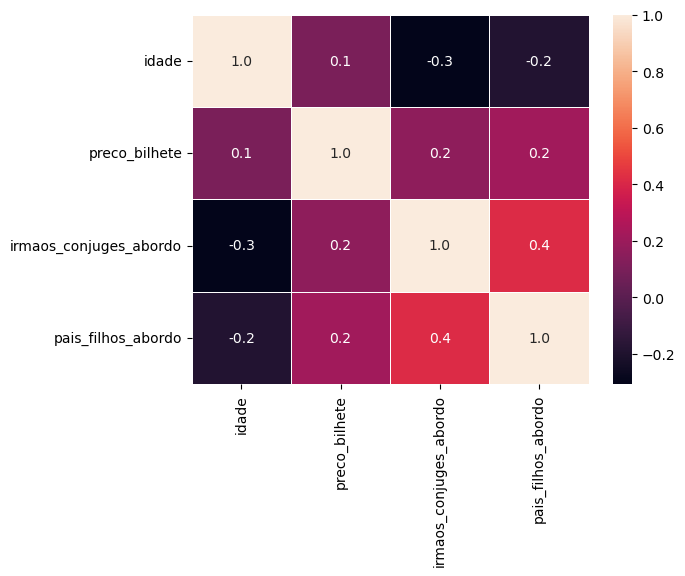

In [11]:
###########
def correlation_variables(df):
  # Pega os dados equivalentes a correçação entre as colunas existentes no dataframe passado.
  correlation = df.corr()
  # Plota uma matriz de confusão para representar os valores encontrados para a possível correlação entre cada coluna do datagrame.
  sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

correlation_variables(df.loc[:,numerical])

# Adicionar um gráfico de regressão

###  Visualize e entenda todas as colunas categóricas.

In [12]:
categorical = [
    "classe_bilhete",
    "genero",
    "numero_bilhete",
    "cabine_numero",
    "local_embarque",
    "sobreviveu",
]

#### Perguntas guias para as categorias categóricas:

- Existem dados faltantes no seu conjunto?

**Resposta:** Sim, há dados faltantes, abaixo temos o código no qual realiza a busca de dados faltantes utilizando uma função já definida neste notebook, com a modificação apenas no parâmetro passado, sendo este as colunas equivalentes as variáveis categóricas.

In [13]:
# Chamada da função get_missing_data_columns() que retorna a quantidade de dados faltantes por coluna.
missing_categorical_data = get_missing_data_columns(df.loc[:,categorical])
missing_categorical_data

,Count,Column
0,687,cabine_numero
1,2,local_embarque


Plotagem da procentagem de dados faltantes em relação ao valor total de dados na amostra para cada coluna.

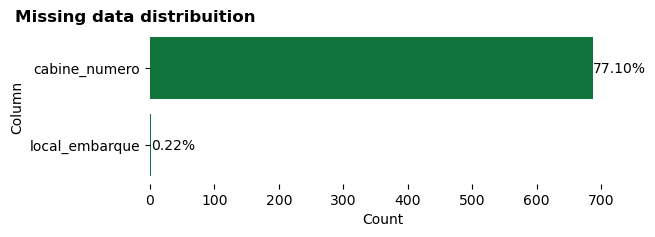

In [14]:
# Chamada da função de plotagem do gráfico de porcentagem de representação dos dados faltantes.
plot_missing_data(missing_categorical_data)

- Conseguimos extrair alguma informação nas colunas `numero_bilhete` e `cabine_numero`? ([Dica](https://pt.wikipedia.org/wiki/Instala%C3%A7%C3%B5es_da_primeira_classe_do_RMS_Titanic))

**Resposta:**

In [15]:
###########
print(df.loc[:,["numero_bilhete", "cabine_numero"]])

                 numero_bilhete cabine_numero
id_passageiro                                
1                     A/5 21171           NaN
2                      PC 17599           C85
3              STON/O2. 3101282           NaN
4                        113803          C123
5                        373450           NaN
...                         ...           ...
887                      211536           NaN
888                      112053           B42
889                  W./C. 6607           NaN
890                      111369          C148
891                      370376           NaN

[891 rows x 2 columns]


- Existe alguma casualidade ou correlação entre as categorias?

**Resposta:**

In [16]:
###########

- Existe alguma relação entre a `classe_bilhete` e o `cabine_numero`?

**Resposta:** Sim, pois a distribuição de passagerios dentro do navio estava associada a classe do bilhete comprado, cada cabine é referenciada utilizando o convés, que é determinado inicialmente pela classe, juntamente com um número para diferenciar cada cabine dentro de um mesmo convés, logo, dependendo da classe em que o passageiro esteja essa letra associada ao convés, irá ser diferente, por exemplo, um passageiro de 1º classe irá ter seu número de cabine iniciando com a letra pertencente a algum convés entre A e F, como definido nas regras do navio.

In [17]:
# Pegar os dados de todos os passageriros da 1º classe.
first = df.loc[(df["classe_bilhete"] == 1)]
# Mostrar a quantidade de bilhetes de passagerios de 1º classe.
print(f"Quantidade de bilhetes para a 1º classe: {first.shape[0]}")

# Pegar os dados de todos os passageiros de 2º e 3º terceira classe.
no_first = df.loc[(df["classe_bilhete"] == 2) | (df["classe_bilhete"] == 3)].loc[:,"cabine_numero"]
# Mostrar a quantidade de bilhetes de passagerios de 2º e 3º classe.
print(f"Quantidade de bilhetes para 2º e 3º classes: {no_first.shape[0]}")

# Mostrando que os dados dos passageiros de 2º e 3º classe não estão contidos no dataset.
print(f"Quantidade de dados faltantes na coluna cabine_numero para as classes 2 e 3: {no_first.isnull().count()}")

# Mostrando que o total de passagerios de todas as classes é equivalente ao total de bilheres da amostra.
print(f"Total de bilhetes: {df.shape[0]}")
print(f"Total de passageiros de 1º, 2º e 3º classes: {first.shape[0] + no_first.shape[0]}")

Quantidade de bilhetes para a 1º classe: 216
Quantidade de bilhetes para 2º e 3º classes: 675
Quantidade de dados faltantes na coluna cabine_numero para as classes 2 e 3: 675
Total de bilhetes: 891
Total de passageiros de 1º, 2º e 3º classes: 891


#### Perguntas chave para as categorias categóricas:

- Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?

**Resposta:** Sim, os dados fornecidos na coluna cabine_numero, estão apenas associados as pessoas da 1º classe, e realizando uma análise, temos que 40% das pessoas sobreviventes estavam alocadas nas cabines destes conveses, destas, aproximadamente 20% estava alocada nas cabines dos conveses B e C, logo podemos dizer que sim, a cabine em que estivesse influenciou na sobrevivência, uma hipótese válida seria que isto aconteceu por uma questão de logística de escape dada a infraestrutura do navio e o posicionamento dos botes disponíveis.

In [18]:
# Aquisição de todos os valores de cabine não nulos.
cabin_not_null = df.query("sobreviveu == True")[~df['cabine_numero'].isnull()]
cabin_not_null.loc[:,["cabine_numero", "sobreviveu"]]

C:\Users\andreina_mendes\AppData\Local\Temp\ipykernel_21884\1147641841.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cabin_not_null = df.query("sobreviveu == True")[~df['cabine_numero'].isnull()]


,cabine_numero,sobreviveu
id_passageiro,,
2,C85,True
4,C123,True
11,G6,True
12,C103,True
22,D56,True
...,...,...
863,D17,True
872,D35,True
880,C50,True


In [19]:
decks = {}

# Para cada célula na coluna cabine_numero, pegar os valores.
for cabin in cabin_not_null["cabine_numero"].values:
  # Pega o primeiro elemento do número da cabine, que é uma letra que representa o convés, e adiciona na lista de conveses, caso não exista.
  if cabin[0] not in decks:
    decks.update({cabin[0]:0})

decks

{'C': 0, 'G': 0, 'D': 0, 'A': 0, 'B': 0, 'F': 0, 'E': 0}

In [20]:
# Pega os dados de todos os sobreviventes.
survivors = df.query("sobreviveu == True")
# Pega a quantidades de linhas dos dados dos sobreviventes.
survivors.shape[0]

342

In [21]:
# Pega os dados da cabine de todos os sobreviventes
survived_cabin = cabin_not_null.query("sobreviveu == True").loc[:,"cabine_numero"]
survived_cabin

id_passageiro
2       C85
4      C123
11       G6
12     C103
22      D56
       ... 
863     D17
872     D35
880     C50
888     B42
890    C148
Name: cabine_numero, Length: 136, dtype: object

In [22]:
# Faz um mapeamento de quantos sobreviventes para cada convés mapeado.
for cabin in survived_cabin.values:
  decks[cabin[0]] += 1

decks

{'C': 35, 'G': 2, 'D': 25, 'A': 7, 'B': 35, 'F': 8, 'E': 24}

In [23]:
# Gera a porcentagem de sobreviventes em relação a quantidade geral, para cada convés.
for deck, value in decks.items():
  decks[deck] = value/survivors.shape[0]

decks

{'C': 0.1023391812865497,
 'G': 0.005847953216374269,
 'D': 0.07309941520467836,
 'A': 0.02046783625730994,
 'B': 0.1023391812865497,
 'F': 0.023391812865497075,
 'E': 0.07017543859649122}

In [24]:
# Calcula a porcentagem final dos sobreviventes para os conveses disponibilizados nos dados.
print(f"Pessoas que sobreviveram estando na primeira classe: {round(sum(list(decks.values())), 2)*100}% da população.")

Pessoas que sobreviveram estando na primeira classe: 40.0% da população.


- Há algum padrão no `numero_bilhete`?

In [25]:
###########
df.loc[:, ["numero_bilhete", "classe_bilhete", "cabine_numero"]]

,numero_bilhete,classe_bilhete,cabine_numero
id_passageiro,,,
1,A/5 21171,3,NaN
2,PC 17599,1,C85
3,STON/O2. 3101282,3,NaN
4,113803,1,C123
5,373450,3,NaN
...,...,...,...
887,211536,2,NaN
888,112053,1,B42
889,W./C. 6607,3,NaN


- Há algum padrão na `cabine_numero`?

**Resposta:** As cabines seguem o padrão convés+número da cabine, exemplo C85, E46, e isto vai está de acordo com a distribuição de conveses para cada classe.

In [26]:
# Pega todos os dados não nulos para o número de cabines.
non_null = df[~df['cabine_numero'].isnull()]
non_null['cabine_numero']

id_passageiro
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: cabine_numero, Length: 204, dtype: object

## Perguntas do Desafio:

- Qual o fator que foi mais importante e menos importante para determinar a sobrevivência para esta população?

**Resposta:** O fator mais importante foi o protocolo marítimo da época, de dar prioridade a crianças e mulheres, nas célular abaixo será mostrada que 72% desta amostra sobreviveu. E o fator menos importante foi o local de embarque dos passageiros, pois este não teve influência no momento do desastre.

In [27]:
# Visualização dos dados dos sobreviventes para análise
df.query("sobreviveu == True")

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
9,True,3,F,27.0,0,2,347742,11.1333,NaN,Southampton
10,True,2,F,14.0,1,0,237736,30.0708,NaN,Cherbourg
...,...,...,...,...,...,...,...,...,...,...
876,True,3,F,15.0,0,0,2667,7.2250,NaN,Cherbourg
880,True,1,F,56.0,0,1,11767,83.1583,C50,Cherbourg
881,True,2,F,25.0,0,1,230433,26.0000,NaN,Southampton


- Você pode dizer que houve alguma influência do poder aquisitivo na sobrevivência do acidente?

**Resposta:** Não é possível de afirmar isto pois pois não há uma diferença discrepante entre as quantidades de sobreviventes para cada classe as classes.

In [28]:
# Filtra o dataframe apenas para os dados dos sobreviventes e após isso faz um agrupamento para classe_bilhete contando quantos dados há para cada classe.
df.query("sobreviveu == True").groupby("classe_bilhete")["sobreviveu"].count()

classe_bilhete
1    136
2     87
3    119
Name: sobreviveu, dtype: int64

- O protocolo marítimo da época do Titanic tinha foco em dar prioridade a crianças e mulheres, analisando os dados podemos dizer se este protocolo foi seguido?


**Resposta:** Sim, o protocolo foi seguido, pois 72% das pessoas do gênero feminino e ou pessoas abaixo de 12 anos sobreviveram.

- Ter uma família no barco influenciou negativamente ou positivamente para a sua sobrevivência?

**Resposta:** Influenciou positivamente já que 51% das pessoas com familiares sobreviveram em contrapartida aos 30% sem familiares que sobreviveram, mas é importante ressaltar que estes resultados possam ter sido influenciados por outros requisitos, além de ter ou não família no navio.

In [29]:
# Pega todos os dados das pessoas que levaram irmão(s)/conjuge(s) ou pais/filhos
with_family = df.loc[(df["irmaos_conjuges_abordo"] > 0) | (df["pais_filhos_abordo"] > 0)]
# Pega todos os dados das pessoas que não levaram irmão(s)/conjuge(s) e pais/filhos
without_family = df.loc[(df["irmaos_conjuges_abordo"] == 0) & (df["pais_filhos_abordo"] == 0)]

# Pega a porcentagem de pessoas com família que sobreviveram em relação ao total da amostra destes.
survived_with_family = with_family.query("sobreviveu == True").shape[0]/with_family.shape[0]
# Pega a porcentagem de pessoas sem família no navio que sobreviveram em relação ao total da amostra destes.
survived_without_family = without_family.query("sobreviveu == True").shape[0]/without_family.shape[0]

# Mostra os resultados no formato de porcentagem.
print(f"Porcentagem dos que sobreviveram com família em relação a toda a amostra com familiares: {round(survived_with_family, 2)*100}%")
print(f"Porcentagem dos que sobreviveram sem família em relação a toda a amostra sem familiares: {round(survived_without_family, 2)*100}%")

Porcentagem dos que sobreviveram com família em relação a toda a amostra com familiares: 51.0%
Porcentagem dos que sobreviveram sem família em relação a toda a amostra sem familiares: 30.0%


- Qual o perfil de quem não sobreviveu? E qual é o perfil de quem sobreviveu? Entenda Perfil como: Gênero, Idade e Classe Social. Caso você identifique alguma nova característica pode adicioná-la ao perfil.

**Resposta:** Dentre os sobreviventes podemos ressaltar que estes estavam bem distribuídos entre as classes e que sua maioria está entre mulheres. Podemos ressaltar também que suas idades estão contidas em sua maioria, no intervalo de 20 a 40 anos.

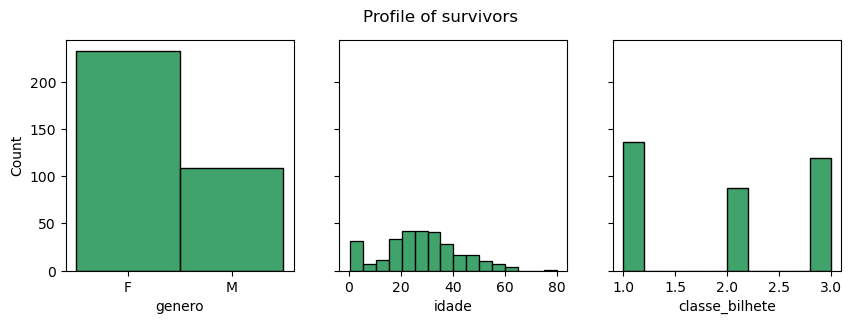

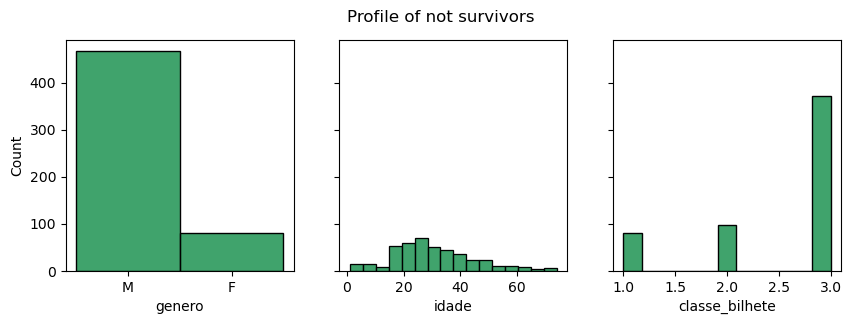

In [30]:
# Pega os dados de gênero, idade e classe_bilhete entre todos os sobreviventes.
survived = df.query("sobreviveu == True").loc[:,["genero", "idade", "classe_bilhete"]]
# Pega os dados de gênero, idade e classe_bilhete entre todos os não sobreviventes.
not_survived = df.query("sobreviveu == False").loc[:,["genero", "idade", "classe_bilhete"]]

# Define uma figura com 3 colunas para mostrar os dados.
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
# Cria um subtítulo para a figura.
fig.suptitle('Profile of survivors')
# Plota um histograma para a contagem de pessoas que sobreviveram considerando o gênero.
sns.histplot(ax=axes[0], x="genero", data=survived, color="#00853B")
# Plota um histograma para a contagem de pessoas que sobreviveram considerando a idade.
sns.histplot(ax=axes[1], x="idade", data=survived, color="#00853B")
# Plota um histograma para a contagem de pessoas que sobreviveram considerando a classe.
sns.histplot(ax=axes[2], x="classe_bilhete", data=survived, color="#00853B")
# Plota a figura com os histogramas.
plt.show()

# Define uma figura com 3 colunas para mostrar os dados.
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
# Cria um subtítulo para a figura.
fig.suptitle('Profile of not survivors')
# Plota um histograma para a contagem de pessoas que não sobreviveram considerando o gênero.
sns.histplot(ax=axes[0], x="genero", data=not_survived, color="#00853B")
# Plota um histograma para a contagem de pessoas que não sobreviveram considerando a idade.
sns.histplot(ax=axes[1], x="idade", data=not_survived, color="#00853B")
# Plota um histograma para a contagem de pessoas que não sobreviveram considerando a classe.
sns.histplot(ax=axes[2], x="classe_bilhete", data=not_survived, color="#00853B")
# Plota a figura com os histogramas.
plt.show()

## Predições com Modelo ML

In [31]:
# Importação dos pacotes scikit-learn
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Reimportando o conjunto de dados
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,numero_bilhete,preco_bilhete,cabine_numero,local_embarque
id_passageiro,,,,,,,,,,
1,False,3,M,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,True,1,F,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,True,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,True,1,F,35.0,1,0,113803,53.1000,C123,Southampton
5,False,3,M,35.0,0,0,373450,8.0500,NaN,Southampton


#### Perguntas guias para criação do modelo:
- Como você pretende tratar os dados faltantes do seu dataset antes de fornecer para o modelo?
- Você consegue criar alguma nova coluna (feature) para fornecer ao modelo?
- Existe alguma coluna que pode ser removida sob algum critério? Como por exemplo correlação?
- Você encontrou `outliers` no dataset? Se sim qual ação foi feita com estes dados?
- Quais normatizações você aplicou nos dados categóricos e numéricos?

**Pré-processamento**

Criação da coluna Convés a partir da coluna cabine numero e remoção da coluna cabine_numero

In [80]:
df_conves = df[df['cabine_numero'].notna()]
df_conves = df_conves['cabine_numero'].apply(lambda x: x[0])
df_conves = pd.DataFrame.from_records(df_conves.values, columns=['conves'])
df_conves.head()

,conves
0,C
1,C
2,E
3,G
4,C


Remoção das colunas cabine_numero, numero_bilhete e local_embarque.

In [81]:
df.pop('cabine_numero')
df.pop('numero_bilhete')
df.pop('local_embarque')
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,,,
1,False,3,M,22.0,1,0,7.2500
2,True,1,F,38.0,1,0,71.2833
3,True,3,F,26.0,0,0,7.9250
4,True,1,F,35.0,1,0,53.1000
5,False,3,M,35.0,0,0,8.0500


Merge com a coluna conves criada.

In [82]:
df = df.assign(conves=df_conves)
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,False,3,M,22.0,1,0,7.2500,C
2,True,1,F,38.0,1,0,71.2833,E
3,True,3,F,26.0,0,0,7.9250,G
4,True,1,F,35.0,1,0,53.1000,C
5,False,3,M,35.0,0,0,8.0500,D


Codificação dos dados da coluna sobreviveu.

In [83]:
df['sobreviveu'] = df['sobreviveu'].replace([False, True], [0, 1])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,M,22.0,1,0,7.2500,C
2,1,1,F,38.0,1,0,71.2833,E
3,1,3,F,26.0,0,0,7.9250,G
4,1,1,F,35.0,1,0,53.1000,C
5,0,3,M,35.0,0,0,8.0500,D


Codificando os dados de genero.

In [84]:
df['genero'] = df['genero'].replace(['M', 'F'], [0, 1])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,C
2,1,1,1,38.0,1,0,71.2833,E
3,1,3,1,26.0,0,0,7.9250,G
4,1,1,1,35.0,1,0,53.1000,C
5,0,3,0,35.0,0,0,8.0500,D


Coletando os dados não repetidos de conves.

In [ ]:
conves = df["conves"].unique()
conves = sorted(conves)
conves

Codificação dos dados da coluna conves.

In [123]:
df['conves'] = df['conves'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7])
df.head()

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.0
2,1,1,1,38.0,1,0,71.2833,4.0
3,1,3,1,26.0,0,0,7.9250,6.0
4,1,1,1,35.0,1,0,53.1000,2.0
5,0,3,0,35.0,0,0,8.0500,3.0


Tratamento dos dados faltantes na coluna conves, usando imputação por mediana.

In [124]:
df['conves'] = df['conves'].fillna(df['conves'].median())
df[df['conves'].isna()]

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,


Tratamento dos dados faltantes na coluna idade, usando imputação por média.

In [126]:
df['idade'] = df['idade'].fillna(df['idade'].mean())
df[df['idade'].isna()]

,sobreviveu,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete,conves
id_passageiro,,,,,,,,


Tratamento de outliers.

In [ ]:
get_outliers(df)

Definição dos dados de entrada e saída.

In [ ]:
X = df
y = df.pop("sobreviveu")

## Perguntas do Desafio  - Modelo:

#### Quais etapas de processamento foram realizadas e o porquê de cada uma?
- Responda de maneira superficial uma vez que você já mostrou via código o que foi feito, quais as etapas do seu dado desde que ele é carregado pelo pandas até ser fornecido ao modelo durante o treinamento.

#### Dos modelos testados qual foi melhor? Porque? Apresenta as métricas do seu melhor modelo.
- Sabendo que você testou pelo menos 2 modelos diferentes, como você definiu o que é o melhor e qual é o melhor.

#### Seu  melhor modelo comete erros? Quais os pontos fracos dele?
- Saber os pontos fracos de seu modelo é crucial durante o seu uso, tente identificar com uma matriz confusão onde o seu modelo erra e o perfil do dado que ele erra.